In [1]:
import pandas as pd

# prevent false warning
# https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas
pd.options.mode.chained_assignment = None  # default='warn'

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

import geopandas
from shapely import wkt

In [29]:
gdf = geopandas.read_file('esida_97_clip.csv')

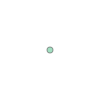

In [30]:
wkt.loads('SRID=4326;POINT(34.66124987639716 -4.182083115116755)'.split(';')[1])

In [31]:
def tmp(wktstr):
    return wkt.loads(wktstr.split(';')[1])

In [32]:
gdf['geometry'] = gdf['geom'].apply(tmp)


In [33]:
gdf

,geom,val,x,y,geometry
0,SRID=4326;POINT(37.61708319794439 -6.657916438...,0.46141573786735535,1,2,POINT (37.61708 -6.65792)
1,SRID=4326;POINT(37.6179165312744 -6.6579164384...,0.46322327852249146,2,2,POINT (37.61792 -6.65792)
2,SRID=4326;POINT(37.61708319794439 -6.658749771...,0.4557512104511261,1,3,POINT (37.61708 -6.65875)
3,SRID=4326;POINT(37.6179165312744 -6.6587497718...,0.4592883884906769,2,3,POINT (37.61792 -6.65875)
4,SRID=4326;POINT(37.61708319794439 -6.659583105...,0.47832614183425903,1,4,POINT (37.61708 -6.65958)
...,...,...,...,...,...
33960,SRID=4326;POINT(37.62041653126443 -6.912916437...,3.3389196395874023,3,18,POINT (37.62042 -6.91292)
33961,SRID=4326;POINT(37.62124986459444 -6.912916437...,3.302978754043579,4,18,POINT (37.62125 -6.91292)
33962,SRID=4326;POINT(37.62208319792445 -6.912916437...,3.2535817623138428,5,18,POINT (37.62208 -6.91292)
33963,SRID=4326;POINT(37.62291653125446 -6.912916437...,3.253467559814453,6,18,POINT (37.62292 -6.91292)


In [34]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 33965 entries, 0 to 33964
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geom      33965 non-null  object  
 1   val       33965 non-null  object  
 2   x         33965 non-null  object  
 3   y         33965 non-null  object  
 4   geometry  33965 non-null  geometry
dtypes: geometry(1), object(4)
memory usage: 1.3+ MB


In [35]:
def conv(x):
    return float(x)

gdf['val2'] = gdf['val'].apply(conv)

<AxesSubplot:>

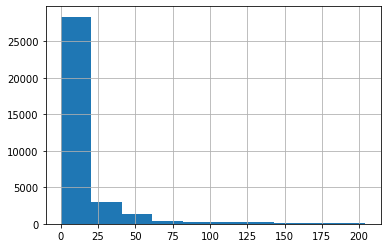

In [36]:
gdf['val2'].hist()

In [37]:
gdf['val2'].sum()

428564.3559528254

In [38]:
district_gdf = geopandas.read_file('Morogor_Urban.geojson')

<AxesSubplot:>

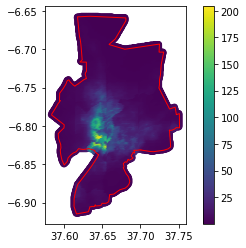

In [39]:
ax = gdf.plot(column='val2', legend=True)


district_gdf.plot(facecolor="none", edgecolor='red', lw=1, ax=ax)
